In [57]:
import src.models.question5 as q5

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## The Oscar Bump: Rating and Review after Nomination and Ceremony

How does the public react when a movie is nominated for an Oscar? 

We gathered the IMDb reviews of all the movies nominated for the "best picture award" and filtered out the ones that were published too early before the nomination date (more that 2 months before the nomination) and too late after the ceremony date (more that 2 months after the ceremony). This leaves us with reviews published in the short period of time around the "Oscar window" (nomination and ceremony generally 2 months later). Our goal with this particular dataset is to determine if trends in the number or reviews and general opinion emerge from an Oscar nomination 

We used the "VaderSentiment" analysis tool in order to compute the "compound score" of each review. A positive review (in terms of words) will have a positive compound score (from 0 to 1) and a negative one will have a negative score (from -1 to 0).

To start our analysis, let us first visualize the distribution of the compound score for the reviews published before and after the nomination: 

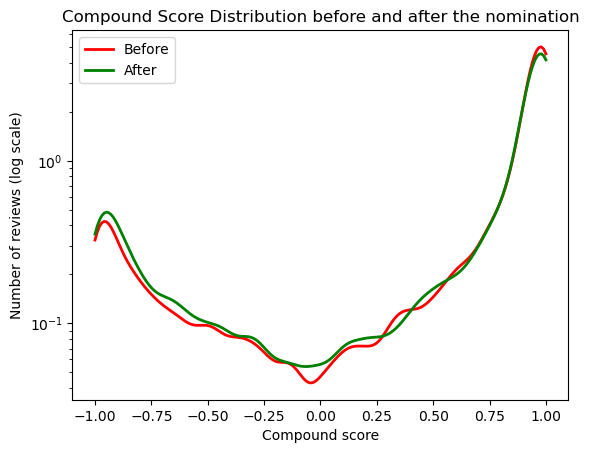

Kolmogorov-Smirnov test p-value: 0.002748683601109237


In [58]:
q5.plot_compound_distribution(type_="nomination")

The plot show that most reviews are either very negative or very positive, with a higher number of positive reviews compared to negative ones. The distribution appears to remain the same before and after the nomination.

People seem to have very polarized opinions. A movie is either a masterpiece or complete garbage!

However, when performing a Kolmogorov-Smirnov test on the two distribution, we have a p-value smaller than 0.05. Thus we reject the null hypothesis that the distributions are the same! This means that we cannot say that the average scores do not stay unchanged.


To see the difference in the compound score further, we trained a regression model using the compound scores from positive, negative, and global reviews, both before and after the nomination. The goal of this analysis is to assess whether there is a significant shift in the mean of the scores before and after this event.

In [59]:
final_df_positive = q5.perform_regression_compound(type_score="positive", type_date="nomination")

                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.057
Date:                Tue, 17 Dec 2024   Prob (F-statistic):              0.304
Time:                        15:30:48   Log-Likelihood:                 5023.3
No. Observations:               15806   AIC:                        -1.004e+04
Df Residuals:                   15804   BIC:                        -1.003e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9011      0.002    454.865      0.0

Based on this regression, we can see that the change in positive scores is not significant (P-Value > 0.05). This suggests that the positive reviews after the nomination remain just as positive as they were before (there is only a shift of 0.001 in the score after the nomination).

In [60]:
final_df_negative = q5.perform_regression_compound(type_score="negative", type_date="nomination")

                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1148
Date:                Tue, 17 Dec 2024   Prob (F-statistic):              0.735
Time:                        15:30:53   Log-Likelihood:                -383.85
No. Observations:                3180   AIC:                             771.7
Df Residuals:                    3178   BIC:                             783.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7194      0.007   -105.044      0.0

Like in the case of the positive reviews, we can observe that the change in negative scores is not significant (P-Value > 0.05). This suggests that the negative reviews after the nomination remain just as negative as they were before (there is only a shift of -0.011 in the score after the nomination).

In [61]:
final_df = q5.perform_regression_compound(type_date="nomination")

                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     14.59
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           0.000134
Time:                        15:30:57   Log-Likelihood:                -17876.
No. Observations:               18972   AIC:                         3.576e+04
Df Residuals:                   18970   BIC:                         3.577e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6616      0.006    103.786      0.0

When considering all reviews (both positive and negative), the resulting p-value of the regression is very small (p < 0.05). This indicates that compound scores significantly decreased after the nomination.

From the two previous tests, we know that the positive and negative compound scores do not change. A plausible explanation for this result could be that a higher number of negative reviews and/or fewer positive reviews are published after the nomination. This shift in review composition lowers the mean compound score, which in this case is -0.036.

To better understand this phenomenon, let’s plot the distributions of the compound scores under different conditions:

- Neutral: Compound score < 0.2
- Positive: Compound score > 0.2
- Really positive: Compound score > 0.8
- (The same thresholds apply to classify negative reviews.)

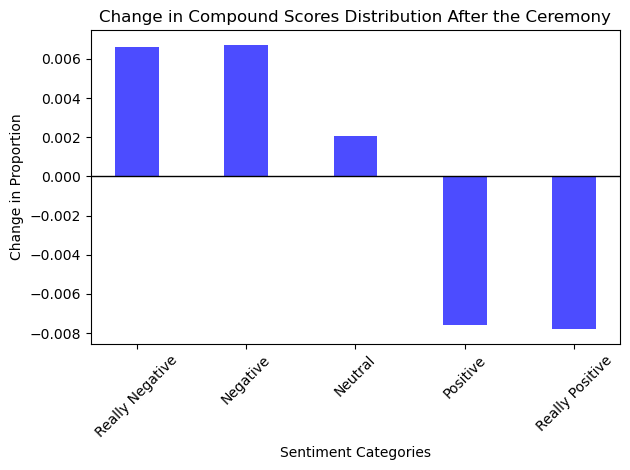

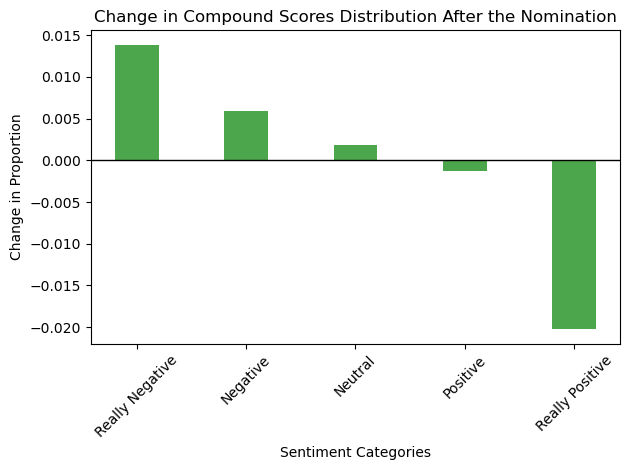

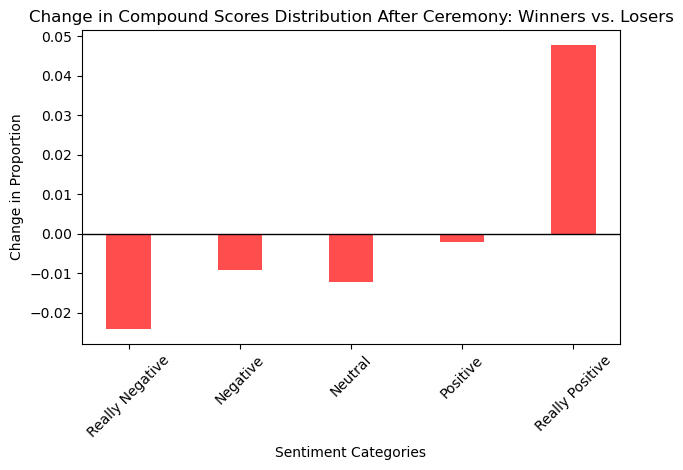

In [62]:
q5.plot_proportions_change()

We observe that each major event (nomination and ceremony) results in an increase in the number of negative reviews. This effect is more pronounced in the case of the nomination.

The final plot reveals that winning movies receive a higher proportion of "Really Positive" reviews and fewer "Really Negative" ones. Interestingly, these movies do not show a larger proportion of "Positive" reviews. This suggests that the positive feedback is more "extreme," with reviewers strongly emphasizing the quality of the winning films.

So far, our tests have been conducted on a global scale. However, can this difference in compound scores also be observed when reviews are grouped by movie? To explore this, we will perform the Wilcoxon test, which assesses whether two distributions are identical, for each individual movie. Specifically, we aim to determine if the review score distributions before and after the nomination or ceremony date are similar.

In [63]:
result_df_nomination = q5.perform_statistical_test_compound(type_="nomination")

There are 8 rejected movies (p-value < 0.05). That represents only 11.594202898550725 percent of the movies


In [64]:
result_df_ceremony = q5.perform_statistical_test_compound(type_="ceremony")

There are 6 rejected movies (p-value < 0.05). That represents only 8.695652173913043 percent of the movies


It appears that significant differences between the score distributions are relatively rare. This suggests that, for most individual movies, the compound scores tend to remain consistent, even after a nomination.

Interestingly, we observe that there are more movies with significant differences after the nomination than after the ceremony. This implies that the nomination generates a larger "buzz" and has a stronger impact on public engagement compared to the ceremony itself. The nomination might act as a catalyst, sparking more engagement and discussions among viewers.

But what about the distinction between winning and non-winning movies? Does receiving an award lead to significant changes in the compound score more frequently? To investigate this, let’s compare the impact of awards on review distributions for winning and non-winning movies.

In [26]:
# Winning movies
result_df_ceremony.loc[(result_df_ceremony['Winner'] == True)].shape[0]

9

In [27]:
# Loosing movies
result_df_ceremony.loc[(result_df_ceremony['Winner'] == False)].shape[0]

57

In [28]:
# 1 / 9 =  11.11%
result_df_ceremony.loc[(result_df_ceremony['Winner'] == True) & (result_df_ceremony['p-value'] < 0.05)]

,Movie ID,Winner,p-value
50,tt1024648,True,0.041748


In [29]:
# 4 / 57 = 7.02%
result_df_ceremony.loc[(result_df_ceremony['Winner'] == False) & (result_df_ceremony['p-value'] < 0.05)]

,Movie ID,Winner,p-value
7,tt0167261,False,0.048062
10,tt0190332,False,0.008090
44,tt0947798,False,0.039597
45,tt0970179,False,0.019484


The percentage of rejected tests (i.e., cases showing a significant difference in the compound score distributions) is higher for winning movies compared to losing ones. This indicates that Oscar-winning movies are more likely to experience a change in the average compound score. This shift could be attributed to the heightened attention and discussion generated by their success.

Winning an Oscar often draws a more polarized response from viewers, leading to a measurable impact on the compound score. On the other side, losing movies tend to maintain more stable compound scores, possibly because they lack the same surge of public interest.

Having completed these tests, the next step is to visualize how the compound scores and review counts evolve over time. By plotting these two metrics on a timeline, we can better understand the dynamics of the audience engagement during key events, such as nominations and awards ceremonies.

Let’s begin by focusing on a single movie:

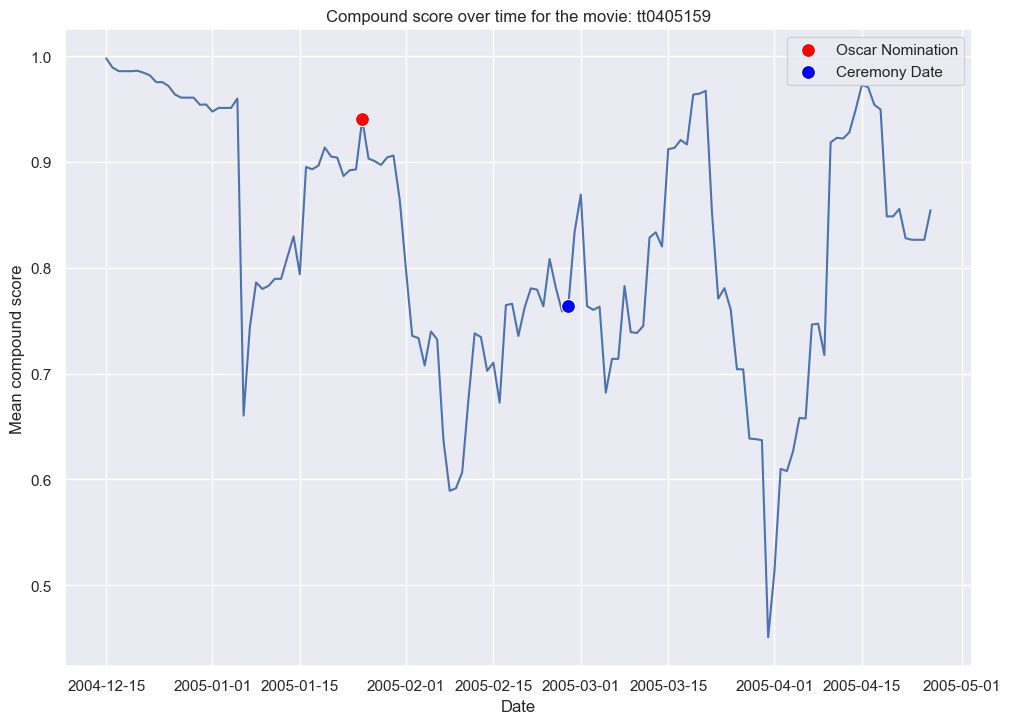

In [25]:
q5.plot_oscar_bump_unique_movie('tt0405159',"compound")

The timeline shows considerable fluctuation. This is likely due to the fact that the average score for a single day is based on only a small number of reviews. With such limited data points, the daily scores become highly volatile, leading to sharp changes from one day to the next.

As a result, the timeline can be difficult to interpret, as these day-to-day variations may not reflect meaningful trends but rather random noise caused by the low volume of reviews.

To address this, we might consider averaging the data over multiple movies to smooth out the fluctuations and reveal more consistent patterns.

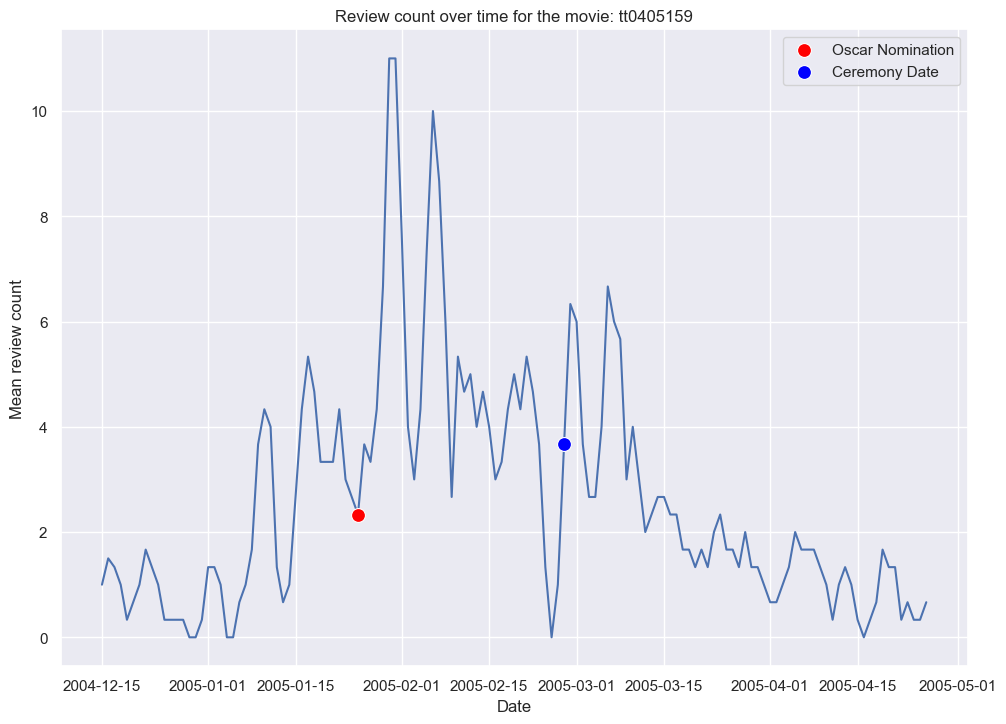

In [11]:
q5.plot_oscar_bump_unique_movie('tt0405159',"count")

The timeline reveals two distinct spikes in the number of reviews, one occurring shortly after the nomination and another following the ceremony. These surges suggest that both events attract heightened attention and engagement from viewers. However, the number of reviews appears to decline rapidly after the ceremony, indicating a drop in public interest once the awards season concludes.

These patterns are quite interesting! Now that we’ve explored the timeline for a single movie, let’s extend this analysis to all the movies and examine whether similar trends hold across the dataset.

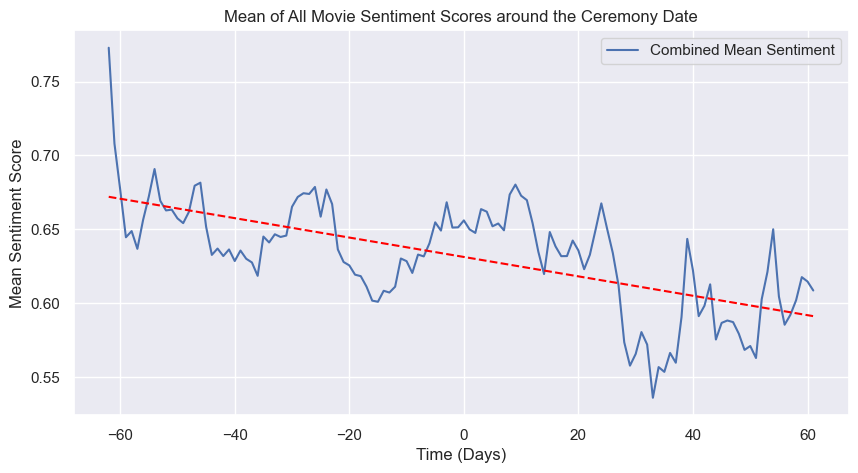

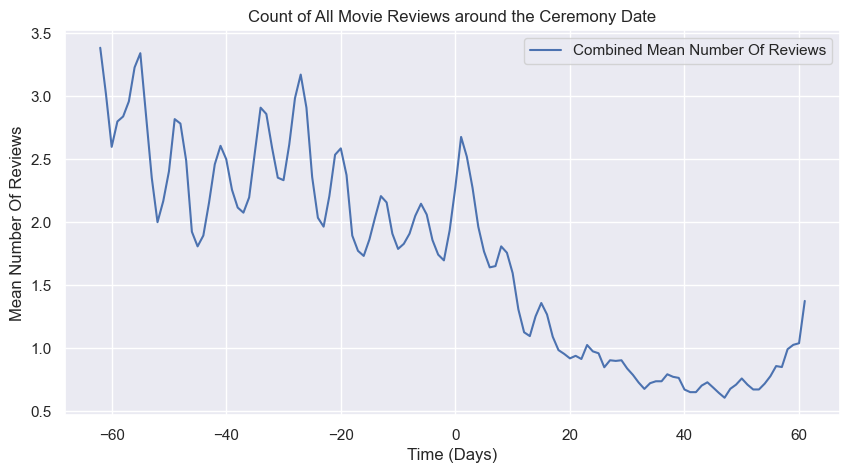

In [31]:
q5.plot_oscar_bump_all_movies()

A clear trend emerges where the mean compound score of nominated movies worsens over time. In other words, the number of negative reviews increases, which aligns with the often critical nature of online websites. It seems that as movies gain more visibility, they also attract more "haters."

We also observe that the number of reviews drops sharply after the ceremony. The hype appears to peak between the nomination and the ceremony, with one final surge in activity immediately following the awards. After this brief post-ceremony spike, engagement rapidly declines, suggesting that public interest fades quickly once the event is over.